CCl4ottoyr,CCl4ottomon,CCl4ottoNHm,CCl4ottoNHsd,CCl4ottoSHm,CCl4ottoSHsd,CCl4ottoGLm,CCl4ottoGLsd
int64,int64,float64,float64,float64,float64,float64,float64
1996,1,nan,nan,nan,nan,nan,nan
1996,2,nan,nan,nan,nan,nan,nan
1996,3,nan,nan,nan,nan,nan,nan
1996,4,105.318,0.197,102.969,0.238,104.144,0.155
1996,5,105.032,0.193,102.754,0.287,103.893,0.174
1996,6,105.327,0.277,103.086,0.273,104.207,0.191
...,...,...,...,...,...,...,...
2019,6,79.279,0.216,77.916,0.26,78.598,0.165
2019,7,79.074,0.163,77.42,0.205,78.247,0.132


,CCl4ottoyr,CCl4ottomon,CCl4ottoNHm,CCl4ottoNHsd,CCl4ottoSHm,CCl4ottoSHsd,CCl4ottoGLm,CCl4ottoGLsd
0,1996,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,2,NaN,NaN,NaN,NaN,NaN,NaN
2,1996,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,4,105.318,0.197,102.969,0.238,104.144,0.155
4,1996,5,105.032,0.193,102.754,0.287,103.893,0.174
...,...,...,...,...,...,...,...,...
283,2019,8,NaN,NaN,NaN,NaN,NaN,NaN
284,2019,9,NaN,NaN,NaN,NaN,NaN,NaN
285,2019,10,NaN,NaN,NaN,NaN,NaN,NaN
286,2019,11,NaN,NaN,NaN,NaN,NaN,NaN


,CCl4ottoyr,CCl4ottomon,CCl4ottoGLm,CCl4ottoGLsd
0,1996,1,NaN,NaN
1,1996,2,NaN,NaN
2,1996,3,NaN,NaN
3,1996,4,104.144,0.155
4,1996,5,103.893,0.174
...,...,...,...,...
283,2019,8,NaN,NaN
284,2019,9,NaN,NaN
285,2019,10,NaN,NaN
286,2019,11,NaN,NaN


,CCl4ottoyr,CCl4ottomon,CCl4ottoGLm,CCl4ottoGLsd,MonthsFrom1996
3,1996,4,104.144,0.155,4
4,1996,5,103.893,0.174,5
5,1996,6,104.207,0.191,6
6,1996,7,104.136,0.147,7
7,1996,8,103.836,0.161,8
...,...,...,...,...,...
278,2019,3,79.008,0.199,279
279,2019,4,78.623,0.149,280
280,2019,5,78.862,0.226,281
281,2019,6,78.598,0.165,282



CCl4 equation parameters and their errors:
a = -0.09550 +/- 0.00018
b = 104.99761 +/- 0.03025

The final equation for CCl4:
-0.09550 x + 104.99761

 Reduced chi squared: 4.60679
A linear model does seem appropriate in this case since it accurately goes through most of the data points on the plot, and since the reduced chi-square value is close to one, which is what we want in order for the model fit to be appropriate


Text(0, 0.5, 'Residuals (ppt)')

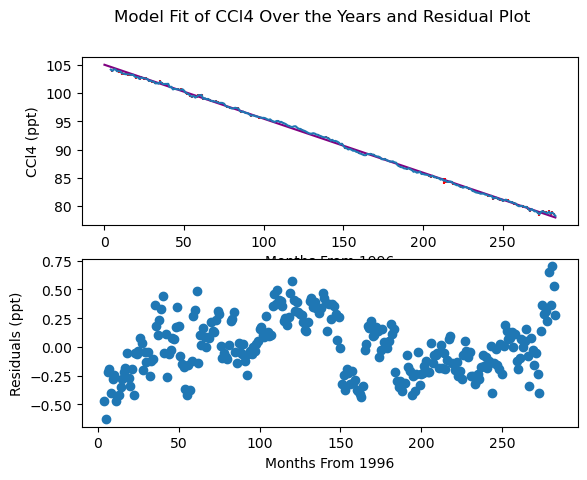

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as fit
from astropy.table import Table

tableCCl4 = Table.read("/Users/joshuawong/Desktop/global_CCl4_MM.dat", format='ascii')
display(tableCCl4)

CCl4 = tableCCl4.to_pandas()
display(CCl4)

CCl4 = CCl4[["CCl4ottoyr","CCl4ottomon","CCl4ottoGLm","CCl4ottoGLsd"]]
display(CCl4)

months = np.arange(1,289)

CCl4 = CCl4.assign(MonthsFrom1996 = months)
CCl4 = CCl4.drop([0,1,2])
CCl4 = CCl4.drop([283,284,285,286,287])
display(CCl4)

fig, ax = plt.subplots(2)
fig.suptitle("Model Fit of CCl4 Over the Years and Residual Plot")
ax[0].errorbar(CCl4["MonthsFrom1996"], CCl4["CCl4ottoGLm"], CCl4["CCl4ottoGLsd"], ecolor="r")
ax[0].set_xlabel("Months From 1996")
ax[0].set_ylabel("CCl4 (ppt)")

def linear(x, a, b):
    return a * x + b

p = [-1, 105]
p1, cov1 = fit.curve_fit(linear, CCl4["MonthsFrom1996"], CCl4["CCl4ottoGLm"], p)

x = np.linspace(0,283,1000)
ax[0].plot(x, linear(x, p1[0], p1[1]), c="purple")


chi1 = sum(((CCl4["CCl4ottoGLm"] - linear(CCl4["MonthsFrom1996"], p1[0], p1[1])) / CCl4["CCl4ottoGLsd"])**2) 
rchi1 = chi1 / (len(CCl4["CCl4ottoGLm"]) - 2)

CCl4errors = []
for i in range(len(cov1)):
    CCl4errors.append(cov1[i][i] ** 0.5)

print('\nCCl4 equation parameters and their errors:')
print('a = {0:1.5f} +/- {1:1.5f}'.format(p1[0], CCl4errors[0]))
print('b = {0:1.5f} +/- {1:1.5f}'.format(p1[1], CCl4errors[1]))

print('\nThe final equation for CCl4:')
print('{0:1.5f} x + {1:1.5f}'.format(p1[0], p1[1]))

print(f'\n Reduced chi squared: {rchi1:.5f}')

print("A linear model does seem appropriate in this case since it accurately goes through most of the data points on the plot, and since the reduced chi-square value is close to one, which is what we want in order for the model fit to be appropriate")

ax[1].scatter(CCl4["MonthsFrom1996"],(CCl4["CCl4ottoGLm"] - linear(CCl4["MonthsFrom1996"], p1[0], p1[1])))
ax[1].set_xlabel("Months From 1996")
ax[1].set_ylabel("Residuals (ppt)")